# Natural Language Processing
El procesamiento del lenguaje natural (NLP) es una rama de la inteligencia artificial que permite a las máquinas entender, interpretar y manipular el lenguaje humano. En esta notebook, nos enfocaremos en el análisis de sentimientos, una aplicación común de NLP que busca determinar la polaridad emocional de un texto. Utilizaremos el dataset de IMDb, que contiene reseñas de películas etiquetadas como positivas o negativas.

# Caso Análisis de Sentimientos

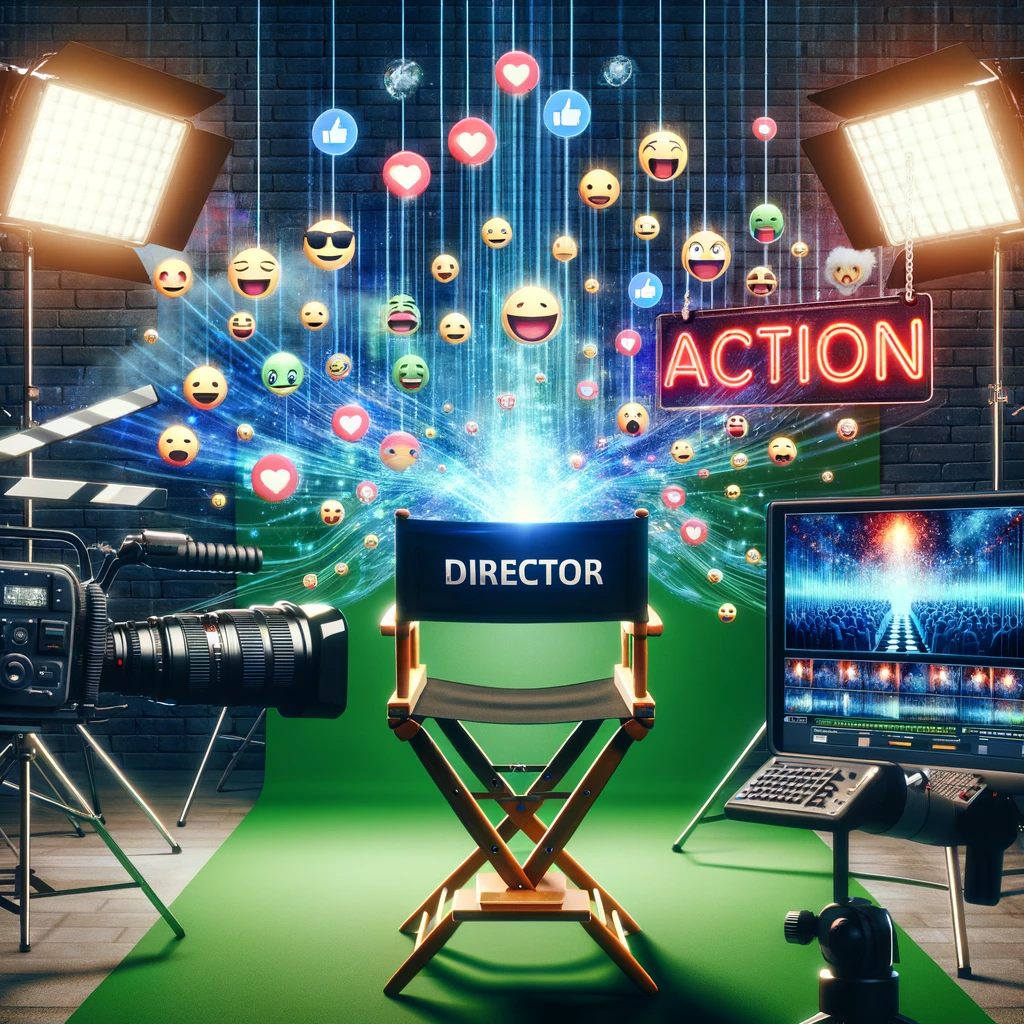

## Herramientas de Procesamiento de Lenguaje Natural y Análisis de Texto

### NLTK (Natural Language Toolkit)
NLTK es una biblioteca líder para la programación en Python de procesos del lenguaje humano. Proporciona interfaces fáciles de usar a más de 50 recursos léxicos corporales y léxicos, como WordNet, junto con una suite de bibliotecas de procesamiento de texto para la clasificación, tokenización, stemming, etiquetado, análisis sintáctico y razonamiento semántico. Es adecuado tanto para investigadores académicos como para desarrolladores industriales.

### Gensim
Gensim es una biblioteca de Python para modelado de temas y procesamiento de lenguaje natural, específicamente diseñada para descubrir la estructura semántica de documentos analizando las relaciones estadísticas entre palabras. Permite al usuario manejar grandes colecciones de texto utilizando algoritmos de espacio vectorial como LDA y similaridades de documentos. Es muy eficiente y escalable, y se utiliza comúnmente en la industria y la academia para tareas de modelado de temas y similitudes de documentos.

### BeautifulSoup
BeautifulSoup es una biblioteca que facilita raspar información de páginas web, permitiendo el parseo de documentos HTML y XML. Se utiliza comúnmente para tareas de web scraping debido a su capacidad para transformar documentos HTML complejos en un árbol de objetos Python comprensible y navegable. Esto permite a los usuarios acceder a elementos específicos del documento de forma rápida y extraer datos de manera eficiente.

Estas herramientas son fundamentales en el campo del procesamiento del lenguaje natural y el análisis de texto, proporcionando capacidades que abarcan desde la preparación y limpieza de texto hasta el análisis avanzado y modelado de temas.


## IMDB Dataset

### Descripción General
El dataset de IMDB contiene reseñas de películas extraídas de la base de datos de películas en Internet (IMDB). Es ampliamente utilizado en el campo del procesamiento del lenguaje natural para tareas de análisis de sentimientos. Este conjunto de datos es particularmente útil para entrenar y evaluar modelos de clasificación de texto que determinan si una reseña es positiva o negativa.

### Características del Dataset
- **Número de Reseñas**: Generalmente, el dataset incluye 50,000 reseñas de películas, divididas equitativamente en dos conjuntos: entrenamiento y prueba.
- **Etiquetado Binario**: Cada reseña ha sido etiquetada como positiva o negativa. En muchas versiones del dataset, las reseñas con una calificación de 7 o superior se consideran positivas, mientras que las que tienen una calificación de 4 o inferior son negativas.
- **Equilibrio de Clases**: El dataset está balanceado, con cantidades iguales de reseñas positivas y negativas, lo cual es ideal para el entrenamiento de modelos de clasificación.

### Usos Comunes
Este dataset se utiliza para entrenar modelos de análisis de sentimientos, donde el objetivo es comprender y clasificar las opiniones expresadas en las reseñas de películas. Los modelos pueden incluir desde simples clasificadores lineales hasta complejas redes neuronales recurrentes o modelos basados en transformadores.

### Importancia Académica y Comercial
El análisis de sentimientos de reseñas de películas tiene aplicaciones importantes tanto en el ámbito académico como en el comercial. Permite a las empresas entender mejor las opiniones de los clientes y adaptar sus estrategias de marketing y desarrollo de productos. En la investigación, proporciona un medio para desarrollar y probar algoritmos avanzados de procesamiento de lenguaje natural.

### Desafíos Asociados
El principal desafío al trabajar con este dataset incluye manejar el lenguaje informal de las reseñas, así como las sutilezas y la ironía que pueden ser difíciles de interpretar para los modelos de aprendizaje automático. Además, el contexto cultural y los elementos subjetivos de las películas pueden influir en la percepción de los sentimientos en el texto.

Este dataset de IMDB es, por lo tanto, una herramienta invaluable para el desarrollo y la mejora de sistemas de procesamiento de lenguaje natural y análisis de sentimientos, ofreciendo a los investigadores y desarrolladores una rica fuente de datos textuales reales y etiquetados para experimentación.

# Preparación del entorno

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Configuración visual para los gráficos
sns.set(style="whitegrid")

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Carga de datos

In [ ]:
# Importar pandas para el manejo de datos
import pandas as pd

# URL del dataset de IMDb en formato CSV
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

# Descargar y descomprimir el archivo directamente
import tarfile
from urllib.request import urlopen

# Función para descargar y extraer el dataset
def download_and_extract_dataset(url):
    response = urlopen(url)
    with tarfile.open(fileobj=response, mode="r:gz") as tar:
        tar.extractall(path='.')

# Llamada a la función de descarga y extracción
download_and_extract_dataset(url)

# Cargar los datos en DataFrames de pandas
# Suponiendo que los datos están en formato texto dentro de directorios separados
import os

def load_imdb_dataset(path='aclImdb'):
    train_texts = []
    train_labels = []
    test_texts = []
    test_labels = []

    for dataset_type in ['train', 'test']:
        for sentiment in ['pos', 'neg']:
            directory = f"{path}/{dataset_type}/{sentiment}"
            for filename in os.listdir(directory):
                if filename.endswith('.txt'):
                    with open(os.path.join(directory, filename), encoding='utf-8') as file:
                        if dataset_type == 'train':
                            train_texts.append(file.read())
                            train_labels.append(1 if sentiment == 'pos' else 0)
                        else:
                            test_texts.append(file.read())
                            test_labels.append(1 if sentiment == 'pos' else 0)

    return pd.DataFrame({'review': train_texts, 'label': train_labels}), pd.DataFrame({'review': test_texts, 'label': test_labels})

# Cargar los datasets
train_df, test_df = load_imdb_dataset()

# Visualización de las primeras filas del dataset de entrenamiento
train_df.head()

,review,label
0,I was lucky enough to have seen this on a whim...,1
1,'Capital City' fans rejoice! This first season...,1
2,I must have been only 11 when Mr Peepers start...,1
3,"The story would never win awards, but that's n...",1
4,"I was very impressed with this small, independ...",1


# Análisis Exploratorio de Datos (EDA)


El análisis exploratorio de datos nos permite entender mejor la naturaleza de los datos con los que estamos trabajando. Exploraremos la distribución de las reseñas positivas y negativas y visualizaremos las palabras más comunes en cada tipo de reseña.



In [ ]:
# Concatenar train_df y test_df
df = pd.concat([train_df, test_df], axis=0)

# Resetear el índice del nuevo DataFrame combinado para evitar índices duplicados
df.reset_index(drop=True, inplace=True)

In [ ]:
df['label'].value_counts()

label
1    25000
0    25000
Name: count, dtype: int64

label
1    25000
0    25000
Name: count, dtype: int64


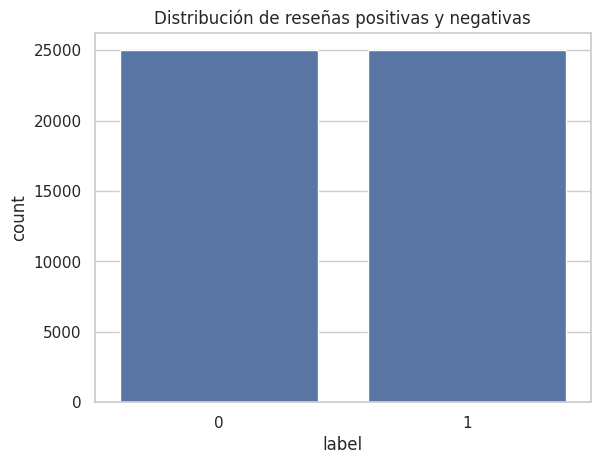

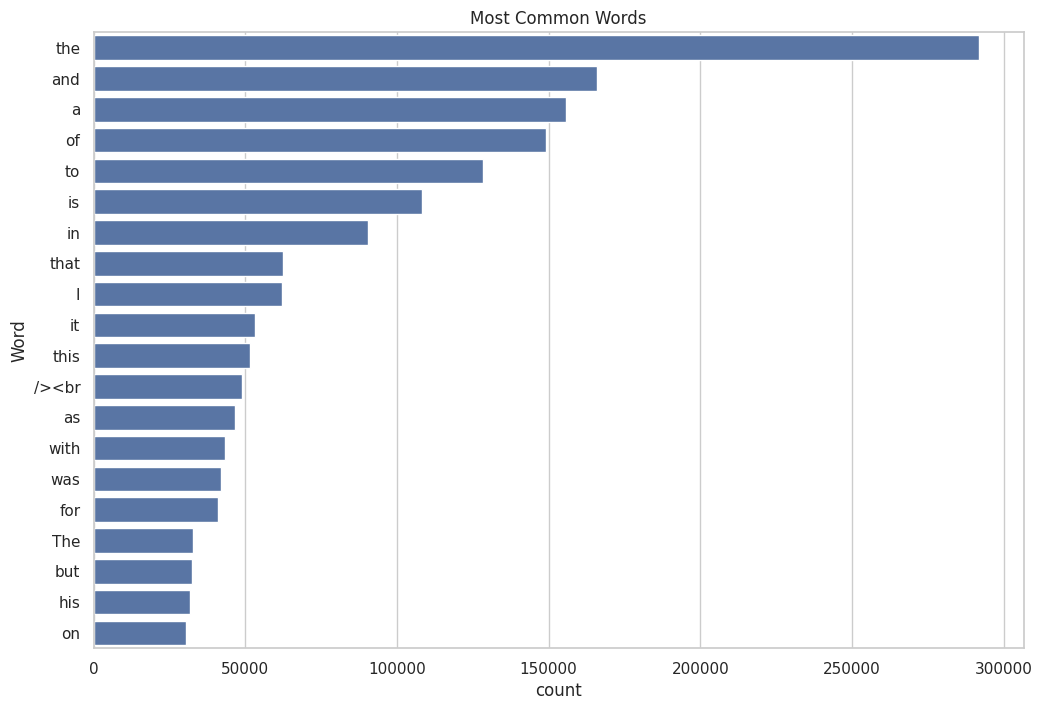

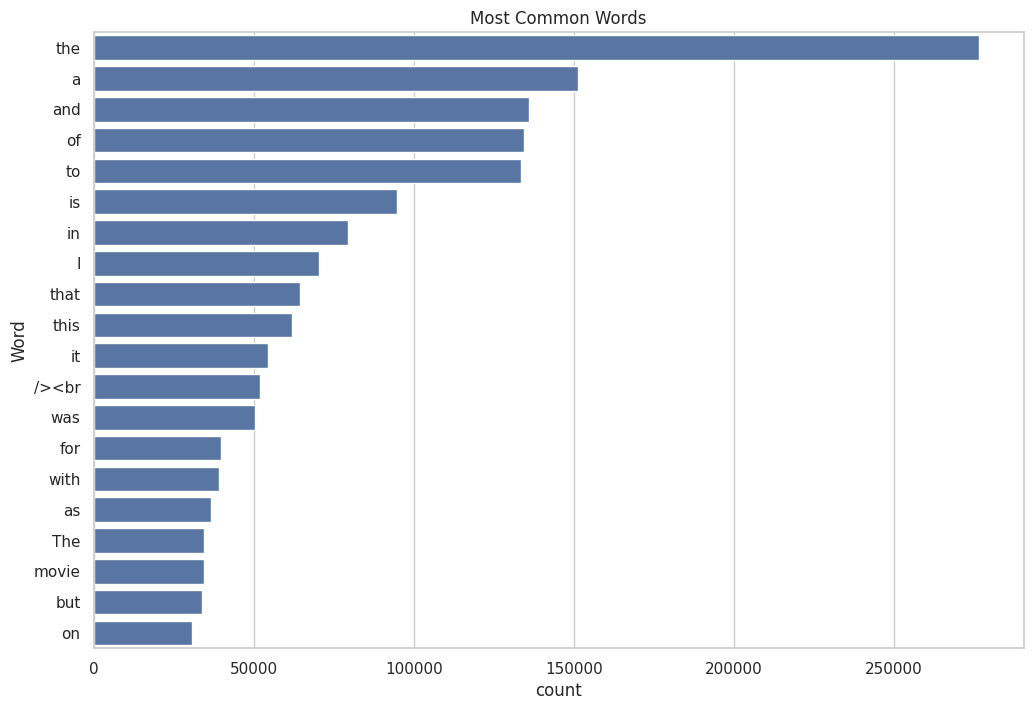

In [ ]:
# Conteo de valores para ver el balance de clases
print(df['label'].value_counts())

# Gráfico de barras para mostrar la distribución de reseñas positivas y negativas
sns.countplot(x='label', data=df)
plt.title('Distribución de reseñas positivas y negativas')
plt.show()

# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()  # Asegúrate de que 'text' no está vacío
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)  # Selecciona las n palabras más frecuentes
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['label'] == 1]['review']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['label'] == 0]['review']
plot_most_common_words(negative_reviews)

# VOLVER A EJECUTAR LUEGO DEL TEXT CLEANING

# Preprocesamiento de Texto


El preprocesamiento es un paso crucial en cualquier tarea de procesamiento de lenguaje natural. Prepararemos el texto para el análisis eliminando elementos innecesarios y normalizando el contenido.

In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar las stopwords de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Función para limpiar el texto
def clean_text(text):
    # Eliminar las etiquetas HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    # Eliminar caracteres no alfabéticos
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

# Aplicar la función de limpieza al DataFrame
train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review'] = test_df['review'].apply(clean_text)

# Mostrar las transformaciones
train_df[['review', 'clean_review']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-53-c38d6f4e6354>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-53-c38d6f4e6354>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,review,clean_review
0,"As always, controversial movies like this have...",always controversial movie like mixed review e...
1,"Karen (Sarah Michelle Gellar), an exchange stu...",karen sarah michelle gellar exchange student j...
2,Hello Playmates.I recently watched this film f...,hello playmate recently watched film first tim...
3,A brilliant chess player attends a tournament ...,brilliant chess player attends tournament fall...
4,"I've read reviews of Kerching on IMDb, and fra...",read review kerching imdb frankly seen one pos...


## Word Clouds


Una "nube de palabras" visualiza las palabras más frecuentes de un texto, con el tamaño de cada palabra proporcional a su frecuencia. Este tipo de visualización es útil para obtener una impresión rápida de los temas más discutidos en el dataset.

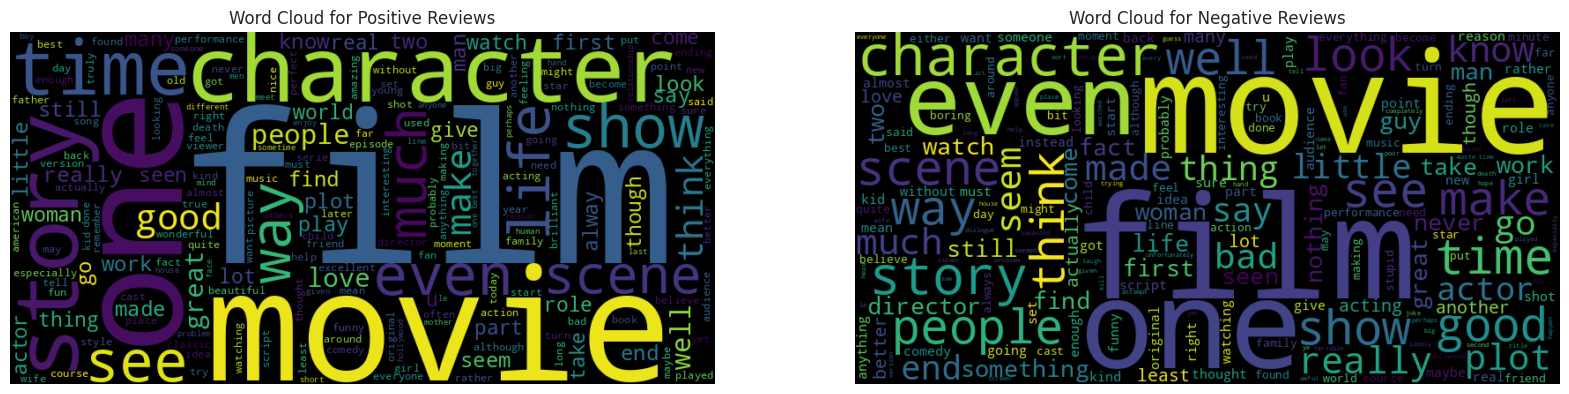

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar una word cloud para las reseñas positivas
positive_text = ' '.join(train_df[train_df['label'] == 1]['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_text)

# Generar una word cloud para las reseñas negativas
negative_text = ' '.join(train_df[train_df['label'] == 0]['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_text)

# Visualización
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

# Extracción de Características


Convertiremos el texto limpio en formatos numéricos que los modelos de machine learning pueden procesar utilizando diferentes técnicas de vectorización.

### Comparativa de Métodos de Extracción de Características
- **Bag of Words**: Crea un vocabulario de todas las palabras únicas en el dataset y usa la frecuencia de las palabras como características. Es simple pero efectiva para muchos problemas de NLP.
- **TF-IDF**: Similar a BoW pero ajusta las frecuencias según la importancia de las palabras en los documentos. Es útil para resaltar palabras que son más relevantes en un contexto específico.

Ambas técnicas tienen sus ventajas y son ampliamente utilizadas en tareas de NLP. La elección entre ellas depende del contexto específico y de los objetivos del análisis.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow_train = vectorizer_bow.fit_transform(train_df['clean_review'])
X_bow_test = vectorizer_bow.transform(test_df['clean_review'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf_train = vectorizer_tfidf.fit_transform(train_df['clean_review'])
X_tfidf_test = vectorizer_tfidf.transform(test_df['clean_review'])

# Comparación de características extraídas
print("Número de características en BoW:", X_bow_train.shape[1])
print("Número de características en TF-IDF:", X_tfidf_train.shape[1])

Número de características en BoW: 66440
Número de características en TF-IDF: 66440


## Visualización de características para cada review - BoW

In [ ]:
import pandas as pd

# Obteniendo nombres de las características (palabras) para BoW
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Convertir una fila de la matriz BoW a DataFrame para una visualización más fácil
def bow_to_df(row_index):
    row = X_bow_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_bow, 'Frequency': row})
    return df[df['Frequency'] > 0]  # Filtrar por frecuencias mayores a cero

# Visualizar la conversión BoW de una revisión específica
example_bow = bow_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_df['clean_review'][0])
example_bow

always controversial movie like mixed review either love hate everyone like movie show perspective killer something personally feel something important consider may hate may claim understand feel though relate regardless movie make think school shooting different perspective movie shot entirely using hand held camera something think work quite well make realistic told completely killer point view mission family outing leading big day zero day planning massacre school zero day offer answer merely present glimpse life two troubled young boy let audience decide feeling towards boy something mixed sympathy hatred yet left confused two ordinary young boy would thing shown surprisingly normal typical teenage boy leading ordinary life know planning expect thing make clear throughout whole movie one else know plan acting extremely good considering two actor complete unknown hope see work future despite fictionalized movie one help notice obvious similarity columbine calvin andre scarily simila

,Word,Frequency
477,acting,1
506,actor,1
512,actual,1
1533,almost,1
1649,always,2
...,...,...
65327,work,2
65411,would,1
65868,yet,1
65981,young,2


## Visualización de características para cada review - TFIDF

In [ ]:
# Obteniendo nombres de las características (palabras) para TF-IDF
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# Convertir una fila de la matriz TF-IDF a DataFrame para una visualización más fácil
def tfidf_to_df(row_index):
    row = X_tfidf_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_tfidf, 'TF-IDF Value': row})
    return df[df['TF-IDF Value'] > 0]  # Filtrar por valores TF-IDF mayores a cero

# Visualizar la conversión TF-IDF de una revisión específica
example_tfidf = tfidf_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_df['clean_review'][0])
example_tfidf

always controversial movie like mixed review either love hate everyone like movie show perspective killer something personally feel something important consider may hate may claim understand feel though relate regardless movie make think school shooting different perspective movie shot entirely using hand held camera something think work quite well make realistic told completely killer point view mission family outing leading big day zero day planning massacre school zero day offer answer merely present glimpse life two troubled young boy let audience decide feeling towards boy something mixed sympathy hatred yet left confused two ordinary young boy would thing shown surprisingly normal typical teenage boy leading ordinary life know planning expect thing make clear throughout whole movie one else know plan acting extremely good considering two actor complete unknown hope see work future despite fictionalized movie one help notice obvious similarity columbine calvin andre scarily simila

,Word,TF-IDF Value
477,acting,0.029914
506,actor,0.030495
512,actual,0.053766
1533,almost,0.038183
1649,always,0.076101
...,...,...
65327,work,0.064869
65411,would,0.025010
65868,yet,0.040031
65981,young,0.075822


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Visualización de distribución de palabras - BoW

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_bow_train)

NameError: name 'vectorizer_bow' is not defined

## Visualización de distribución de palabras - TF-IDF

<ipython-input-32-a593edae70f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')


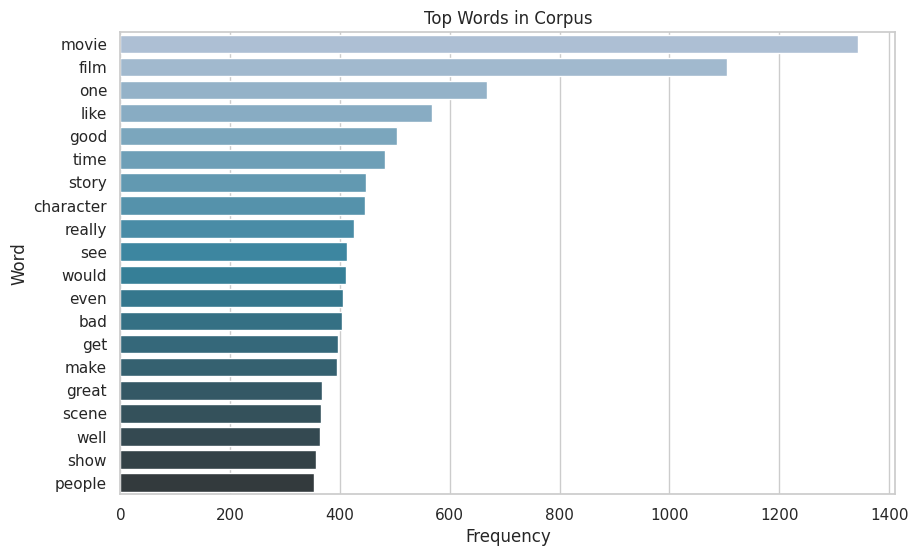

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_tfidf_train)

## Entrenamiento de modelo de regresión logística basado en BoW

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_bow_train, train_df['label'])  # Asumiendo que 'label' es la etiqueta de sentimiento

# Evaluación del modelo
predictions = model.predict(X_tfidf_test)
print(classification_report(test_df['label'], predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     12500
           1       0.86      0.79      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Entrenamiento de modelo de regresión logística basado en TFIDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_tfidf_train, train_df['label'])  # Asumiendo que 'label' es la etiqueta de sentimiento

# Evaluación del modelo
predictions = model.predict(X_tfidf_test)
print(classification_report(test_df['label'], predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Word Embeddings

Los embeddings de palabras son representaciones vectoriales densas que capturan relaciones semánticas entre palabras. Exploraremos dos enfoques populares: GloVe y Word2Vec

### Modelo de embeddings preentrenado



GloVe es un modelo de embeddings de palabras que se desarrolló como una alternativa a las técnicas tradicionales de modelado de palabras como Word2Vec. Fue introducido por investigadores de la Universidad de Stanford en un intento de combinar lo mejor de dos mundos en el campo de los embeddings de palabras: los métodos basados en la matriz de co-ocurrencia y los métodos predictivos.

Los embeddings preentrenados de GloVe están disponibles públicamente y pueden ser cargados fácilmente usando bibliotecas como `gensim` o directamente en frameworks de deep learning como TensorFlow y PyTorch. Estos modelos están entrenados en varios corpus y están disponibles en múltiples dimensiones, lo que permite a los investigadores y desarrolladores elegir el que mejor se adapte a sus necesidades específicas.


In [ ]:
# Cargar embeddings preentrenados de GloVe
glove_vectors = api.load("glove-twitter-25")

# Función para obtener el vector promedio para una reseña
def document_vector(doc):
    # Quitar palabras que no están en el vocabulario de embeddings
    words = [word for word in doc.split() if word in glove_vectors.key_to_index]
    if len(words) >= 1:
        return np.mean(glove_vectors[words], axis=0)
    else:
        return []

# Aplicar la función a las reseñas limpias
train_df['doc_vector'] = train_df['clean_review'].apply(document_vector)
test_df['doc_vector'] = test_df['clean_review'].apply(document_vector)

# Verificar que los vectores estén correctamente calculados
train_df.head()

,review,label,clean_review,word2vec_vector,doc_vector
0,"As always, controversial movies like this have...",1,always controversial movie like mixed review e...,"[-0.0338283, 0.16523883, -0.020149322, -0.0385...","[-0.030055037, 0.23317884, 0.021985454, -0.094..."
1,"Karen (Sarah Michelle Gellar), an exchange stu...",1,karen sarah michelle gellar exchange student j...,"[-0.009917697, 0.18583341, 0.040788293, 0.0459...","[-0.074693516, 0.11268911, -0.015110825, -0.12..."
2,Hello Playmates.I recently watched this film f...,1,hello playmate recently watched film first tim...,"[0.00920951, 0.15136218, 0.06325904, 0.0026651...","[-0.12667988, 0.15574314, 0.06265688, -0.22422..."
3,A brilliant chess player attends a tournament ...,1,brilliant chess player attends tournament fall...,"[-0.024652595, 0.13011402, 0.0033169368, 0.086...","[0.005417739, 0.04595645, -0.022305828, -0.307..."
4,"I've read reviews of Kerching on IMDb, and fra...",1,read review kerching imdb frankly seen one pos...,"[-0.00788247, 0.15358952, -0.032949947, -0.045...","[-0.1666885, 0.28278092, 0.2245373, -0.1644504..."


In [ ]:
print(f'Ejemplo de vector:\n\n {train_df["doc_vector"][0]}')
print(f'\nTamaño del embedding: {len(train_df["doc_vector"][0])}')

Ejemplo de vector:

 [-0.03005504  0.23317884  0.02198545 -0.09462079 -0.01719747  0.07474815
  1.1733499  -0.46817124 -0.20683844 -0.20866953 -0.31381148  0.42505237
 -3.7113938   0.15296288  0.1647188   0.31239444  0.31820872 -0.15854768
  0.10736554 -0.36331773 -0.03737936  0.17621621 -0.15814146 -0.06142762
 -0.36926958]

Tamaño del embedding: 25


### Modelo de embeddings preentrenado - Word2Vec

Para mejorar la eficiencia y efectividad de nuestras aplicaciones de NLP, podemos utilizar modelos de Word2Vec que han sido preentrenados en grandes datasets. Esto nos permite aprovechar embeddings de palabras que capturan relaciones semánticas complejas, sin necesidad de un extenso entrenamiento en nuestros propios datos.

El modelo preentrenado de Google News contiene 300 vectores dimensionales entrenados en un conjunto de datos de aproximadamente 100 mil millones de palabras.


In [ ]:
# Cargar el modelo preentrenado de Word2Vec
word2vec_model_pretrained = api.load("word2vec-google-news-300")

In [ ]:
# Ejemplo de uso: obtener el vector para una palabra
word = 'computer'
word_vector = word2vec_model_pretrained[word]  # Vector de 'computer'
print(f"Vector for '{word}':\n {word_vector}\n")
print(f"Embedding size for '{word}': {len(word_vector)}")  # Imprimir el tamaño del embedding

# Utilizar el modelo para buscar palabras similares
similar_words = word2vec_model_pretrained.most_similar('computer', topn=10)

# Imprimir palabras similares y sus vectores
print(f"\nTop 10 similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word} (similarity: {similarity})")

Vector for 'computer':
 [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
 

### Entrenamiento de Word2Vec


Además de usar embeddings preentrenados, entrenaremos nuestro modelo Word2Vec con el corpus del dataset IMDb.

In [ ]:
# Entrenar modelo Word2Vec
sentences = [review.split() for review in train_df['clean_review']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

# Función para convertir una reseña en un vector promedio usando nuestro modelo Word2Vec
def vectorize_review(review, model):
    words = [word for word in review.split() if word in model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0) #Promedio de todos los vectores (embedding de cada palabra)
    else:
        return np.zeros(model.vector_size)

train_df['word2vec_vector'] = train_df['clean_review'].apply(lambda x: vectorize_review(x, word2vec_model))
test_df['word2vec_vector'] = test_df['clean_review'].apply(lambda x: vectorize_review(x, word2vec_model))

# Verificar los vectores generados
train_df.head()

,review,label,clean_review,word2vec_vector,doc_vector
0,"As always, controversial movies like this have...",1,always controversial movie like mixed review e...,"[-0.05619735, 0.1779742, 0.0029799799, -0.0203...","[-0.030055037, 0.23317884, 0.021985454, -0.094..."
1,"Karen (Sarah Michelle Gellar), an exchange stu...",1,karen sarah michelle gellar exchange student j...,"[-0.041370828, 0.16682623, 0.050053272, 0.0552...","[-0.074693516, 0.11268911, -0.015110825, -0.12..."
2,Hello Playmates.I recently watched this film f...,1,hello playmate recently watched film first tim...,"[-0.0055659856, 0.17788701, 0.01188799, 0.0319...","[-0.12667988, 0.15574314, 0.06265688, -0.22422..."
3,A brilliant chess player attends a tournament ...,1,brilliant chess player attends tournament fall...,"[-0.06612716, 0.09009801, 0.04911947, 0.160629...","[0.005417739, 0.04595645, -0.022305828, -0.307..."
4,"I've read reviews of Kerching on IMDb, and fra...",1,read review kerching imdb frankly seen one pos...,"[-0.048779048, 0.17726271, 0.013439641, -0.005...","[-0.1666885, 0.28278092, 0.2245373, -0.1644504..."


### Comparativa de Embeddings

- **GloVe**: Utiliza información estadística del corpus completo para producir embeddings que capturan relaciones globales entre palabras. Es muy útil cuando la relación semántica global es crucial.
- **Word2Vec**: Aprende embeddings que reflejan relaciones contextuales locales. Es poderoso para captar matices en usos específicos de palabras en contextos similares.

Cada técnica tiene sus fortalezas dependiendo de la naturaleza del problema y los datos disponibles. GloVe es ideal para capturar relaciones semánticas en un nivel macro, mientras que Word2Vec es excelente para entender contextos específicos.


# Reducción de dimensionalidad y visualización en el espacio con t-SNE y UMAP


t-Distributed Stochastic Neighbor Embedding (t-SNE) y Uniform Manifold Approximation and Projection (UMAP) son técnicas de reducción de dimensionalidad que son particularmente efectivas para visualizar datos de alta dimensión, como embeddings de palabras o documentos. A diferencia del PCA, que es lineal, t-SNE y UMAP son técnicas no lineales que preservan mejor la estructura local de los datos.

### t-SNE

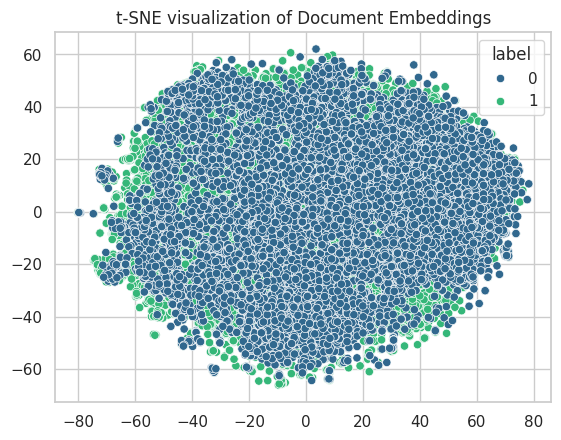

In [ ]:
from sklearn.manifold import TSNE

# Preparar datos para t-SNE
X = np.array(list(train_df['word2vec_vector']))
y = train_df['label']

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Visualización de t-SNE
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis')
plt.title('t-SNE visualization of Document Embeddings')
plt.show()

### UMAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


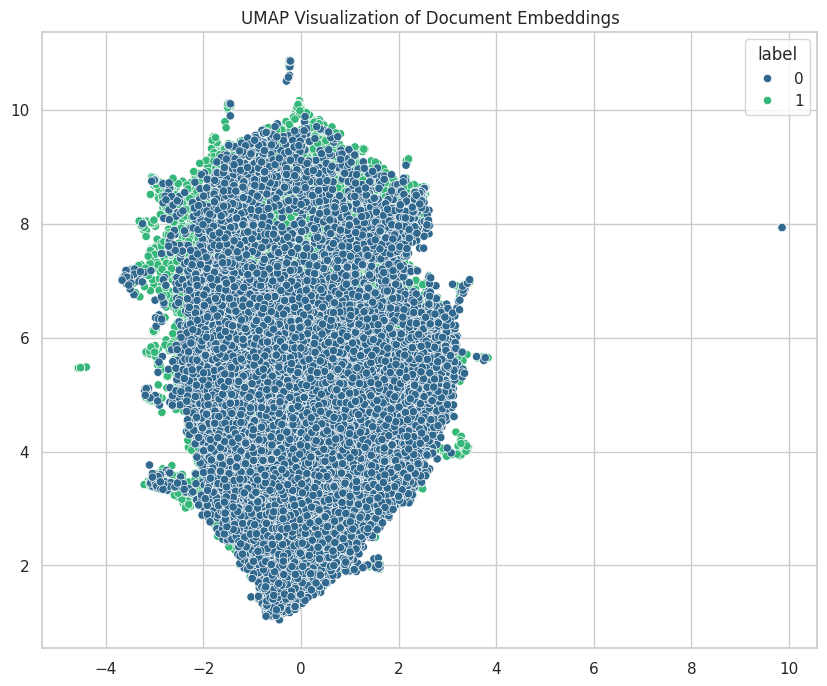

In [ ]:
import umap

# Preparar datos para UMAP
X = np.array(list(train_df['word2vec_vector']))
y = train_df['label']

# Aplicar UMAP
reducer = umap.UMAP(random_state=42)
X_reduced_umap = reducer.fit_transform(X)

# Visualización de UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced_umap[:, 0], y=X_reduced_umap[:, 1], hue=y, palette='viridis')
plt.title('UMAP Visualization of Document Embeddings')
plt.show()

## Modelado para Análisis de Sentimientos usando embeddings



Finalmente, usaremos los vectores de características generados para entrenar un modelo de clasificación y evaluar su desempeño.

### Entrenamiento GloVe

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['doc_vector']))
X_test = np.array(list(test_df['doc_vector']))
y_train = train_df['label'].values
y_test = test_df['label'].values

# Entrenar un modelo de regresión logística con los vectores de GloVe
model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train, y_train)

# Predicciones y evaluación
predictions_glove = model_glove.predict(X_test)
print(classification_report(y_test, predictions_glove))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     12500
           1       0.77      0.73      0.75     12500

    accuracy                           0.75     25000
   macro avg       0.76      0.75      0.75     25000
weighted avg       0.76      0.75      0.75     25000



### Entrenamiento Word2Vec

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['word2vec_vector']))
X_test = np.array(list(test_df['word2vec_vector']))
y_train = train_df['label']
y_test = test_df['label']

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y evaluación
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12500
           1       0.84      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



# Modelos de redes neuronales para NLP

## Modelo RNN Simple

**Descripción General**
Las Redes Neuronales Recurrentes (RNN) son una clase de redes neuronales diseñadas específicamente para trabajar con secuencias de datos, como series temporales o secuencias lingüísticas. La característica distintiva de las RNN es su capacidad de mantener un estado interno o memoria que les permite procesar entradas secuenciales de manera efectiva.

**Características Principales**
- **Recurrencia**: En las RNN, las salidas de ciertas neuronas se retroalimentan a la entrada de estas durante el proceso de aprendizaje, lo que les permite 'recordar' información previa.
- **Capacidad de modelado de secuencia**: Son capaces de modelar dependencias temporales en los datos, lo que es crucial para tareas como la predicción de series temporales y el procesamiento del lenguaje natural.

**Ventajas**
- **Flexibilidad en la longitud de la entrada**: Las RNN pueden manejar entradas de longitud variable, lo que es ideal para procesar oraciones de longitud diversa o series temporales de distintos períodos.
- **Aplicabilidad en tareas de secuencia**: Eficientes en tareas donde la secuencialidad de los datos es importante, como el análisis de texto y el reconocimiento de voz.

**Desventajas**
- **Problema del desvanecimiento del gradiente**: Durante el entrenamiento, las RNN pueden sufrir de desvanecimiento o explosión del gradiente, lo que dificulta aprender dependencias a largo plazo.
- **Costo computacional**: El entrenamiento puede ser computacionalmente costoso y lento debido a las dependencias entre los cálculos de las etapas temporales.

**Usos Comunes**
- Procesamiento del lenguaje natural, como la generación de texto y la traducción automática.
- Análisis de series temporales en finanzas o medicina.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preparación de datos
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['clean_review'])
sequences = tokenizer.texts_to_sequences(train_df['clean_review'])
X_train = pad_sequences(sequences, maxlen=100)
y_train = train_df['label'].values

# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(5000, 64, input_length=100))
model_rnn.add(SimpleRNN(50))  # 50 unidades RNN
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Entrenamiento del modelo
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.7045 - loss: 0.5464
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.8900 - loss: 0.2817
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.9370 - loss: 0.1753
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9724 - loss: 0.0829
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9911 - loss: 0.0359


**Tokenizacion**
La primera etapa en el procesamiento del texto implica convertir las reseñas en una forma que la red neuronal pueda procesar. Utilizamos un `Tokenizer` de Keras, que nos permite convertir el texto en secuencias de enteros. Aquí, cada entero representa una palabra única en el corpus. Para este modelo, limitamos el número de palabras más frecuentes a considerar a 5,000.

**Conversión de Texto a Secuencias**
Convertimos los textos en listas de índices de palabras. Estas secuencias son las que alimentarán a la red neuronal.

**Padding de Secuencias**
Para asegurar que todas las entradas de la red tengan el mismo tamaño, utilizamos el padding de las secuencias a la misma longitud (100 palabras en este caso), cortando las secuencias más largas o rellenando con ceros las más cortas.

**Labels**
Los labels o etiquetas de las reseñas se preparan para el entrenamiento, asegurando que sean adecuados para un problema de clasificación binaria.

**Capa de Embedding**
La capa de Embedding en Keras es utilizada para convertir índices enteros (los identificadores de cada palabra en el vocabulario) en vectores densos de tamaño fijo. Actúa como una tabla de búsqueda que mapea los índices de palabras a vectores densos. Estos vectores son aprendidos durante el entrenamiento del modelo.

## Modelo LSTM

**Long Short-Term Memory Networks (LSTM)**

**Descripción General**
Las LSTM son una extensión de las redes neuronales recurrentes que intentan resolver el problema del desvanecimiento del gradiente incorporando 'puertas' que regulan el flujo de información. Estas puertas permiten que las LSTM retengan información útil a largo plazo y descarten la que no lo es.

**Características Principales**
- **Puertas de olvido, entrada y salida**: Estas puertas controlan respectivamente la memoria que se descarta, la nueva información que se añade y la información que se pasa a la siguiente etapa de la secuencia.
- **Capacidad de retención a largo plazo**: Gracias a estas puertas, las LSTM pueden mantener dependencias de largo plazo de manera más efectiva que las RNN simples.

**Ventajas**
- **Mejor en aprender dependencias a largo plazo**: Pueden aprender patrones a largo plazo en los datos, lo que es crucial en muchas aplicaciones de NLP y series temporales.
- **Prevención del desvanecimiento del gradiente**: Las puertas específicas ayudan a mitigar los problemas de desvanecimiento o explosión del gradiente.

**Desventajas**
- **Complejidad y coste computacional**: Las LSTM son más complejas y requieren más tiempo y recursos computacionales para entrenar que las RNN simples.
- **Diseño más complejo**: La arquitectura de las LSTM es más difícil de implementar y afinar debido a la mayor cantidad de parámetros y configuraciones.

**Usos Comunes**
- Modelado de lenguaje y aplicaciones de texto donde las dependencias de largo plazo son críticas.
- Predicciones en problemas de series temporales complejas.


In [ ]:
from tensorflow.keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 64, input_length=100))
model_lstm.add(LSTM(50))  # 50 unidades LSTM
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Entrenamiento del modelo
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.7528 - loss: 0.4834
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9038 - loss: 0.2458
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.9245 - loss: 0.2035
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.9390 - loss: 0.1643
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9508 - loss: 0.1342


## Evaluación y comparativa de Modelos


Utilizaremos varias métricas clave para evaluar y comparar los modelos de RNN, LSTM y BERT. Estas métricas incluyen la precisión (accuracy), el recall, el F1-score y la matriz de confusión.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Asumimos que tienes X_test y y_test preparados para evaluación

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = (predictions > 0.5).astype(int) #Convertir de continuo a binario las probabilidades de cada clase
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    return accuracy, recall, f1, conf_matrix

sequences = tokenizer.texts_to_sequences(train_df['clean_review'])
X_test = pad_sequences(sequences, maxlen=100)
y_test = test_df['label'].values

# Evaluar RNN
accuracy_rnn, recall_rnn, f1_rnn, conf_matrix_rnn = evaluate_model(model_rnn, X_test, y_test)
# Evaluar LSTM
accuracy_lstm, recall_lstm, f1_lstm, conf_matrix_lstm = evaluate_model(model_lstm, X_test, y_test)

# Imprimir los resultados
print("RNN Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_rnn, recall_rnn, f1_rnn))
print("LSTM Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_lstm, recall_lstm, f1_lstm))

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step
RNN Model - Accuracy: 1.00, Recall: 1.00, F1 Score: 1.00
LSTM Model - Accuracy: 0.97, Recall: 0.97, F1 Score: 0.97


### Comparativa de Modelos
- **RNN**: Más rápido de entrenar, pero puede tener dificultades con dependencias de largo plazo debido al desvanecimiento del gradiente.
- **LSTM**: Mejor en la captura de dependencias de largo plazo que RNN y adecuado para secuencias más largas.

La elección del modelo depende de las especificaciones del proyecto, los recursos disponibles y la naturaleza del problema de NLP a resolver.


# Implementación Text Retrieval

## Recuperación de Texto con TF-IDF

TF-IDF, que significa "Term Frequency-Inverse Document Frequency", es una técnica de vectorización de texto que refleja la importancia de una palabra en un documento en relación con una colección de documentos o corpus. Esta técnica es especialmente útil en la recuperación de información para evaluar la relevancia de un documento dado una consulta de búsqueda.

### Implementación de Recuperación de Texto con TF-IDF

La implementación de recuperación de texto utilizando TF-IDF implica varios pasos clave que incluyen la preparación de los datos, la vectorización y el proceso de recuperación basado en la similitud del coseno.

1. **Preparación de Datos**: Es esencial que los datos estén limpios y preprocesados, lo cual incluye la eliminación de stopwords, la tokenización y la normalización de texto (como convertir a minúsculas).

2. **Vectorización de Documentos**: Usamos TF-IDF para convertir los documentos de texto en vectores numéricos. TF-IDF penaliza las palabras que aparecen muy frecuentemente en el corpus y que son, por lo tanto, menos informativas.

3. **Consulta y Recuperación**: Para una consulta dada, transformamos la consulta en un vector utilizando el mismo vectorizador TF-IDF. Luego, empleamos la similitud del coseno para encontrar los documentos que son más similares a la consulta.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['clean_review'])

# Función para buscar en el dataset
def text_retrieval(query, tfidf_vectorizer, tfidf_matrix, top_n=5):
    # Vectorizar la consulta utilizando el mismo vectorizador TF-IDF
    query_vector = tfidf_vectorizer.transform([query])

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval("amazing", tfidf_vectorizer, tfidf_matrix)
relevant_reviews[['review']]

,review
1891,This is a taut suspenseful masterpiece from Br...
8110,This movie was incredible. I would recommend i...
9843,"I remember this movie from when i was 12, it w..."
7493,Oh yeah! Jenna Jameson did it again! Yeah Baby...
10184,This film was in one word amazing! I have only...


## Recuperación de Texto con Word2Vec

Word2Vec es una técnica de modelado de lenguaje que aprende embeddings de palabras en un espacio vectorial de dimensiones fijas a partir de grandes corpus de texto. Cada palabra se representa por un vector, y las palabras con contextos similares en el corpus tienden a tener vectores similares, lo que refleja sus significados semánticos. Esta característica hace de Word2Vec una herramienta útil para tareas de recuperación de texto, donde queremos encontrar documentos relevantes basados en la similitud semántica más que en coincidencias exactas de palabras.

### Implementación de Recuperación de Texto con Word2Vec

Para implementar la recuperación de texto utilizando Word2Vec, seguimos estos pasos:

1. **Preparación de Datos**: Asegúrate de tener un modelo de Word2Vec entrenado disponible. Este modelo es utilizado para convertir el texto de los documentos en vectores.

2. **Vectorización de Documentos**: Convertimos cada documento en un vector promedio de todos los embeddings de las palabras contenidas en el documento. Esto nos da una representación densa y significativa del contenido de cada texto.

3. **Consulta y Recuperación**: Para una consulta dada, convertimos el texto de la consulta en su vector correspondiente usando el mismo modelo de Word2Vec. Luego calculamos la similitud del coseno entre el vector de la consulta y los vectores de todos los documentos en el dataset para determinar cuáles son los más relevantes.


In [ ]:
# Función para obtener el vector promedio de Word2Vec para un documento
def document_vector_word2vec(doc, model):
    words = doc.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Crear una matriz de características con todos los documentos vectorizados
doc_vectors = np.array([document_vector_word2vec(doc, word2vec_model) for doc in train_df['clean_review']])

# Función para buscar en el dataset
def text_retrieval_word2vec(query, model, doc_vectors, top_n=5):
    query_vector = document_vector_word2vec(query, model)
    query_vector = query_vector.reshape(1, -1)  # Reshape para compatibilidad con cosine_similarity

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, doc_vectors).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval_word2vec("amazing", word2vec_model, doc_vectors)
relevant_reviews[['review']]

,review
11286,The Color Purple is a masterpiece. It displays...
10184,This film was in one word amazing! I have only...
8110,This movie was incredible. I would recommend i...
4185,"""The Color Purple"", is truly amazing. There is..."
4356,If you havn't seen this movie I highly recomme...
